In [1]:
#using Revise
addprocs(4)
using VDPTag2, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = VDPTagMDP()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
## Study

In [4]:
study = RewardvsN(VDPTagMDP)

CMDPs.RewardvsN
  mdp: VDPTag2.VDPTagMDP{Void}
  bandits: Array{DataType}((1,))
  n_seeds: Int64 500
  n_iters: Array{Int64}((8,)) [10, 50, 100, 200, 500, 1000, 1500, 2000]
  max_steps: Int64 10


In [5]:
result = run_study(study)

CMDPs.RewardvsNResult("VDPTag", 4000×4 DataFrames.DataFrame
│ Row  │ alg            │ seed │ n_iters │ r_total │
├──────┼────────────────┼──────┼─────────┼─────────┤
│ 1    │ MCTS.DPWBandit │ 1    │ 10      │ -10.0   │
│ 2    │ MCTS.DPWBandit │ 2    │ 10      │ -10.0   │
│ 3    │ MCTS.DPWBandit │ 3    │ 10      │ -10.0   │
│ 4    │ MCTS.DPWBandit │ 4    │ 10      │ -10.0   │
│ 5    │ MCTS.DPWBandit │ 5    │ 10      │ -10.0   │
│ 6    │ MCTS.DPWBandit │ 6    │ 10      │ -10.0   │
│ 7    │ MCTS.DPWBandit │ 7    │ 10      │ 91.0    │
│ 8    │ MCTS.DPWBandit │ 8    │ 10      │ -10.0   │
│ 9    │ MCTS.DPWBandit │ 9    │ 10      │ -10.0   │
│ 10   │ MCTS.DPWBandit │ 10   │ 10      │ -10.0   │
│ 11   │ MCTS.DPWBandit │ 11   │ 10      │ -10.0   │
⋮
│ 3989 │ MCTS.DPWBandit │ 489  │ 2000    │ -10.0   │
│ 3990 │ MCTS.DPWBandit │ 490  │ 2000    │ 96.0    │
│ 3991 │ MCTS.DPWBandit │ 491  │ 2000    │ 95.0    │
│ 3992 │ MCTS.DPWBandit │ 492  │ 2000    │ 92.0    │
│ 3993 │ MCTS.DPWBandit │ 493  │ 2000

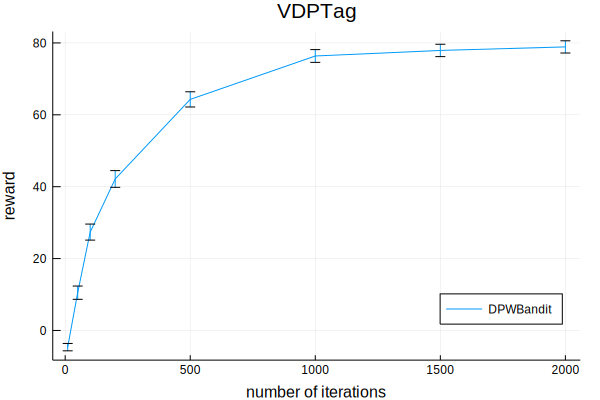

In [6]:
plot(result)

In [7]:
result.title

"VDPTag"